In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
 img = cv2.imread('tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
 assert img is not None, "file could not be read, check with os.path.exists()"
 #print(img.shape)
 print(img.shape[0]*img.shape[1])
     

110592


In [3]:
 hist, bins = np.histogram(img.flatten(),256,[0,255]) # 2D to 1D to use np historam     

In [5]:
cdf = hist.cumsum()
print(cdf.max())
#cdf_normalized = cdf * float(hist.max()) / cdf.max()
cdf_normalized = cdf / cdf.max()

110592


In [6]:
 img_eq = 255.0*cdf_normalized[img.flatten()]
 img_eq = img_eq.reshape(img.shape).astype(np.uint8)

(<Axes: title={'center': 'equalized'}>,
 (-0.5, 383.5, 287.5, -0.5),
 Text(0.5, 1.0, 'equalized'))

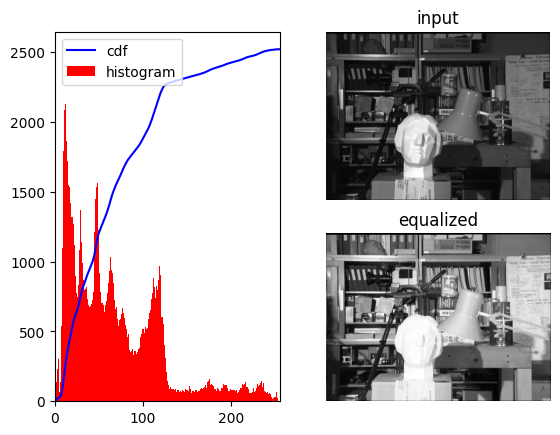

In [7]:
plt.subplot(1,2,1)
plt.plot(cdf_normalized*float(hist.max()), color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.subplot(2,2,2), plt.imshow(img, cmap="gray"), plt.axis('off'), plt.title('input')
plt.subplot(2,2,4), plt.imshow(img_eq, cmap="gray"), plt.axis('off'), plt.title('equalized')


In [9]:
hist_eq, bins_eq = np.histogram(img_eq.flatten(),256,[0,255]) # 2D to 1D to use np historam  
cdf_eq = hist_eq.cumsum()
print(cdf_eq.max())
#cdf_normalized = cdf * float(hist.max()) / cdf.max()
cdf_eq_normalized = cdf_eq / cdf_eq.max()

110592


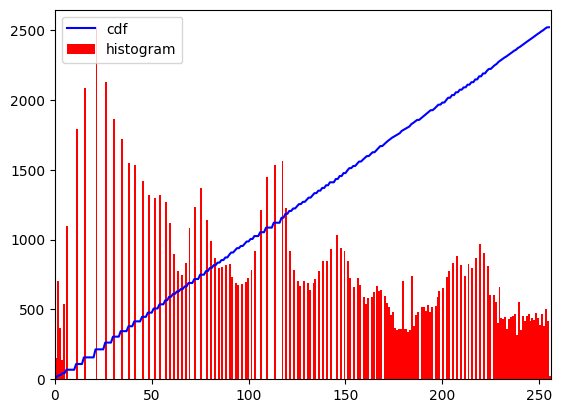

In [10]:
plt.plot(cdf_eq_normalized*float(hist_eq.max()), color = 'b')
plt.hist(img_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

(<Axes: title={'center': 'equalized'}>,
 (-0.5, 383.5, 287.5, -0.5),
 Text(0.5, 1.0, 'equalized'))

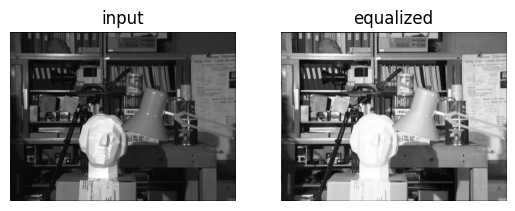

In [11]:
img = cv2.imread('tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img_eq = cv2.equalizeHist(img)

plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.axis('off'), plt.title('input')
plt.subplot(1,2,2), plt.imshow(img_eq, cmap="gray"), plt.axis('off'), plt.title('equalized')

In [12]:
 # create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_cl1 = clahe.apply(img)

(<Axes: title={'center': 'adaptive equalized'}>,
 (-0.5, 383.5, 287.5, -0.5),
 Text(0.5, 1.0, 'adaptive equalized'))

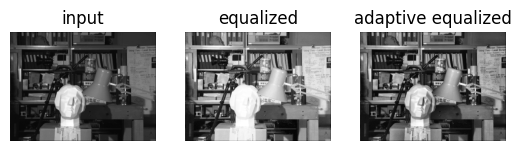

In [13]:
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.axis('off'), plt.title('input')
plt.subplot(1,3,2), plt.imshow(img_eq, cmap="gray"), plt.axis('off'), plt.title('equalized')
plt.subplot(1,3,3), plt.imshow(img_cl1, cmap="gray"), plt.axis('off'), plt.title('adaptive equalized')